Need data files "exp3a_data.csv" and "exp3b_data.csv"

# Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Patch

# Process Data

In [3]:
data3a = pd.read_csv('../Data/exp3a_data.csv')
data3b = pd.read_csv('../Data/exp3b_data.csv')

In [4]:
data3a["condition"] = data3a["shape"] + "_" + data3a["changeType"]
data3b["condition"] = data3b["shape"] + "_" + data3b["changeType"]

In [5]:
data3a.head()

,shape,changeType,blockNum,trialID,response,confidence,rt,experimentVersion,correctAnswer,fullShapeName,responded_correctly,analysisChangeType,subject,condition
0,shape3,no_change2,0,0,same,9,9077.0,v001,same,shape3_no_change2,1,none,1,shape3_no_change2
1,shape1,no_change1,0,1,same,9,3606.0,v001,same,shape1_no_change1,1,none,1,shape1_no_change1
2,shape5,no_change3,0,2,same,8,2494.0,v001,same,shape5_no_change3,1,none,1,shape5_no_change3
3,shape6,no_change1,0,3,same,8,4671.0,v001,same,shape6_no_change1,1,none,1,shape6_no_change1
4,shape2,no_change2,0,4,same,8,2797.0,v001,same,shape2_no_change2,1,none,1,shape2_no_change2


In [6]:
data3b.head()

,shape,changeType,blockNum,trialID,response,confidence,rt,experimentVersion,correctAnswer,fullShapeName,responded_correctly,analysisChangeType,subject,condition
0,shape6,no_change1,0,0,same,8,5088.3,control,same,shape6_no_change1,1,none,1,shape6_no_change1
1,catch_shape,change1,0,1,different,9,3265.9,control,different,catch_shape_change1,1,none,1,catch_shape_change1
2,shape4,no_change1,0,2,same,9,2182.2,control,same,shape4_no_change1,1,none,1,shape4_no_change1
3,shape5,no_change4,0,3,same,9,3093.5,control,same,shape5_no_change4,1,none,1,shape5_no_change4
4,shape1,no_change4,0,4,same,9,1870.6,control,same,shape1_no_change4,1,none,1,shape1_no_change4


In [7]:
# replace string value by binary value
data3a["response"].replace(to_replace="same", value=0, inplace=True)
data3a["response"].replace(to_replace="different", value=1, inplace=True)
data3b["response"].replace(to_replace="same", value=0, inplace=True)
data3b["response"].replace(to_replace="different", value=1, inplace=True)

C:\Users\andic\AppData\Local\Temp\ipykernel_2332\4108794198.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data3a["response"].replace(to_replace="same", value=0, inplace=True)
C:\Users\andic\AppData\Local\Temp\ipykernel_2332\4108794198.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [8]:
data3a.shape, data3b.shape

((6048, 14), (5400, 14))

In [9]:
# exclude catch and no_change trials
data3a = data3a[data3a["condition"].str.contains("catch")==False]
data3a = data3a[data3a["condition"].str.contains("no_change")==False]

data3b = data3b[data3b["condition"].str.contains("catch")==False]
data3b = data3b[data3b["condition"].str.contains("no_change")==False]

In [10]:
data3a.groupby(["condition"])["response"].mean()[:10]

condition
shape1_concave_area1           0.553571
shape1_concave_area2           0.785714
shape1_concave_nofill_area1    0.642857
shape1_concave_nofill_area2    0.678571
shape1_convex_area1            0.732143
shape1_convex_area2            0.821429
shape2_concave_area1           0.821429
shape2_concave_area2           0.785714
shape2_concave_nofill_area1    0.928571
shape2_concave_nofill_area2    0.678571
Name: response, dtype: float64

In [11]:
data3b.groupby(["condition"])["response"].mean()[:10]

condition
shape1_concave_area1           0.68
shape1_concave_area2           0.86
shape1_concave_nofill_area1    0.78
shape1_concave_nofill_area2    0.60
shape1_convex_area1            0.88
shape1_convex_area2            0.94
shape2_concave_area1           0.84
shape2_concave_area2           0.98
shape2_concave_nofill_area1    1.00
shape2_concave_nofill_area2    0.88
Name: response, dtype: float64

In [12]:
df3a = pd.DataFrame(data3a.groupby(["condition"])["response"].mean()).reset_index()
df3b = pd.DataFrame(data3b.groupby(["condition"])["response"].mean()).reset_index()

In [13]:
df3a.head()

,condition,response
0,shape1_concave_area1,0.553571
1,shape1_concave_area2,0.785714
2,shape1_concave_nofill_area1,0.642857
3,shape1_concave_nofill_area2,0.678571
4,shape1_convex_area1,0.732143


In [14]:
df3b.head()

,condition,response
0,shape1_concave_area1,0.68
1,shape1_concave_area2,0.86
2,shape1_concave_nofill_area1,0.78
3,shape1_concave_nofill_area2,0.60
4,shape1_convex_area1,0.88


In [15]:
# Extract percentage of noticing change in each condition in exp 3a and 3b
print(df3a[df3a['condition'].str.contains("concave_area")==True])
concave3a = df3a[df3a['condition'].str.contains("concave_area")==True]["response"].to_numpy() * 100
convex3a = df3a[df3a['condition'].str.contains("convex_area")==True]["response"].to_numpy() * 100
nofill3a = df3a[df3a['condition'].str.contains("concave_nofill_area")==True]["response"].to_numpy() * 100

print(df3b[df3b['condition'].str.contains("concave_area")==True])
concave3b = df3b[df3b['condition'].str.contains("concave_area")==True]["response"].to_numpy() * 100
convex3b = df3b[df3b['condition'].str.contains("convex_area")==True]["response"].to_numpy() * 100
nofill3b = df3b[df3b['condition'].str.contains("concave_nofill_area")==True]["response"].to_numpy() * 100

               condition  response
0   shape1_concave_area1  0.553571
1   shape1_concave_area2  0.785714
6   shape2_concave_area1  0.821429
7   shape2_concave_area2  0.785714
12  shape3_concave_area1  0.267857
13  shape3_concave_area2  0.482143
18  shape4_concave_area1  0.410714
19  shape4_concave_area2  0.946429
24  shape5_concave_area1  0.464286
25  shape5_concave_area2  0.625000
30  shape6_concave_area1  0.410714
31  shape6_concave_area2  0.607143
36  shape7_concave_area1  0.303571
37  shape7_concave_area2  0.607143
42  shape8_concave_area1  0.428571
43  shape8_concave_area2  0.660714
               condition  response
0   shape1_concave_area1      0.68
1   shape1_concave_area2      0.86
6   shape2_concave_area1      0.84
7   shape2_concave_area2      0.98
12  shape3_concave_area1      0.38
13  shape3_concave_area2      0.50
18  shape4_concave_area1      0.86
19  shape4_concave_area2      0.94
24  shape5_concave_area1      0.56
25  shape5_concave_area2      0.84
30  shape6_concave_a

In [16]:
assert len(concave3a) == len(concave3b)
assert len(convex3a) == len(convex3b)
assert len(nofill3a) == len(nofill3b)

# Compare Percentage of Noticing Change

In [17]:
def significance(pvalue):
  # labeling significance level by p value
  if pvalue < 0.001:
    return '***'
  elif pvalue < 0.01:
    return '**'
  elif pvalue < 0.05:
    return '*'
  else:
    return 'NS'

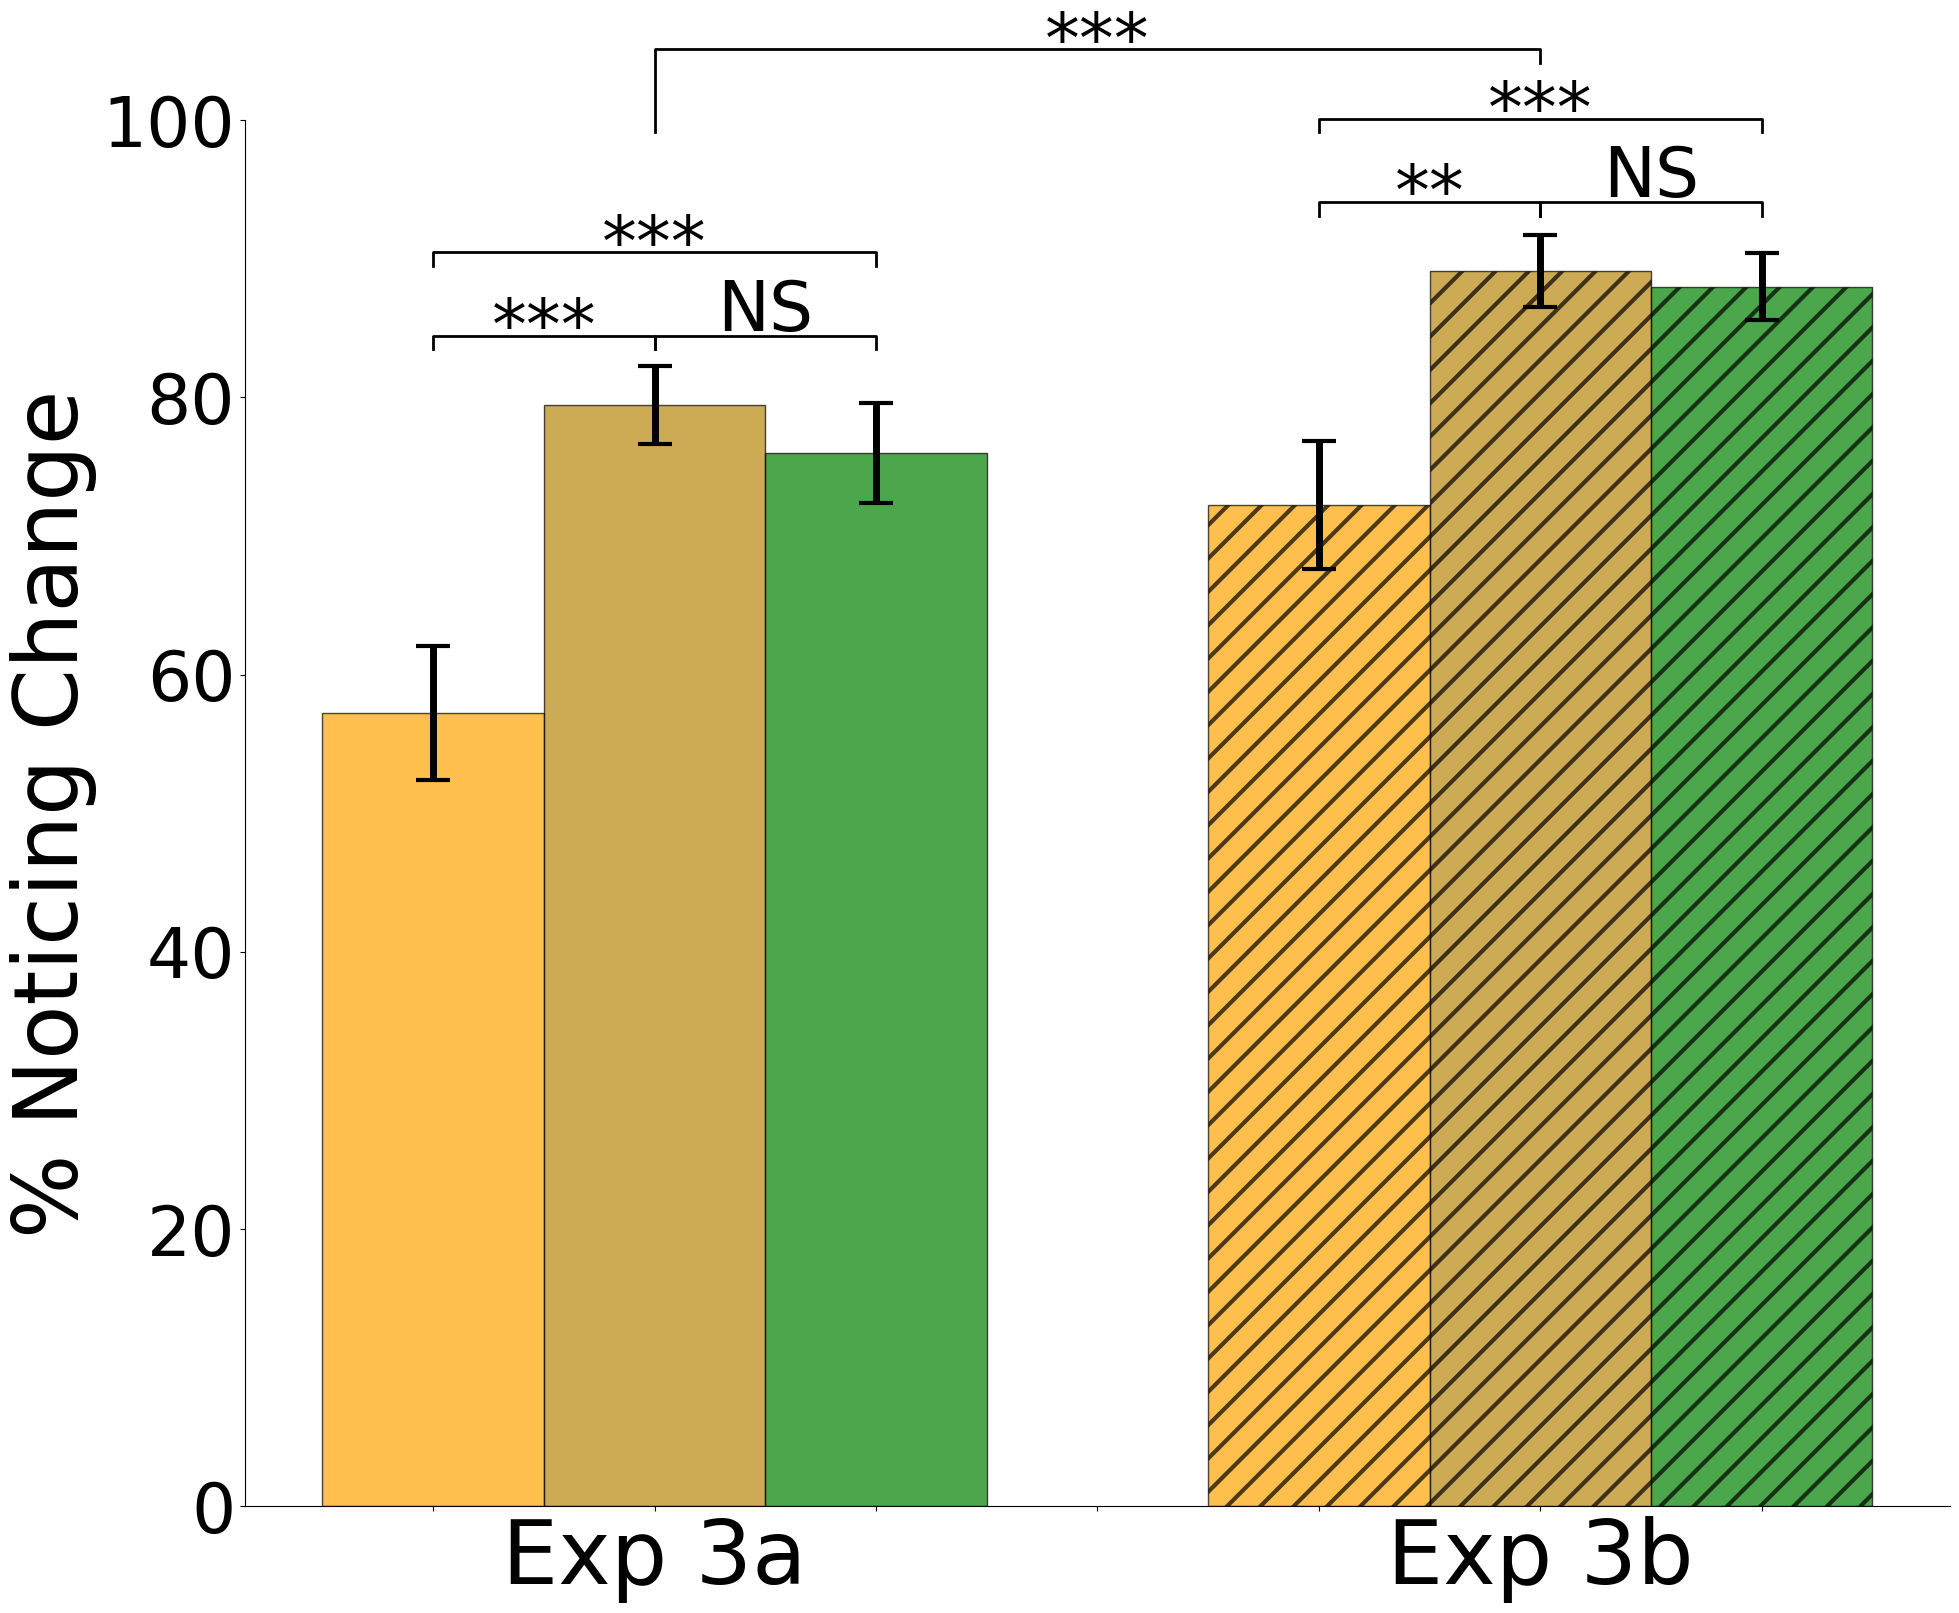

In [18]:
_, ax = plt.subplots(1,1, figsize=(22, 18))
LABELFONT = 64
TICKFONT = 50
LEGENDFONT = 50

# Plot exp 3a data
ax.bar(0, concave3a.mean(), 1, 
       yerr = [stats.sem(concave3a)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='orange', edgecolor='k', 
       label='Concave')
ax.bar(1, nofill3a.mean(), 1, 
       yerr = [stats.sem(nofill3a)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='darkgoldenrod', edgecolor='k', 
       label='NoFill')
ax.bar(2, convex3a.mean(), 1, 
       yerr = [stats.sem(convex3a)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='green', edgecolor='k', 
       label='Convex')

#---CHANGE---
concave3b_mean = concave3b.mean()
nofill3b_mean = nofill3b.mean()
convex3b_mean = convex3b.mean()
#------------

# Plot exp 3b data
plt.rcParams['hatch.linewidth'] = 3
ax.bar(4, concave3b.mean(), 1, 
       yerr = [stats.sem(concave3b)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='orange', edgecolor='k', 
       hatch='/')
ax.bar(5, nofill3b.mean(), 1, 
       yerr = [stats.sem(nofill3b)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='darkgoldenrod', edgecolor='k', 
       hatch='/')
ax.bar(6, convex3b.mean(), 1, 
       yerr = [stats.sem(convex3b)], 
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='green', edgecolor='k', 
       hatch='/')


# Annotate paired t-test results across conditions in exp 3a
x1, x2, y, h = 0, 1, nofill3a.mean()+4, 1
sig = significance(stats.ttest_rel(concave3a, nofill3a)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)
x1, x2, y, h = 1, 2, nofill3a.mean()+4, 1
sig = significance(stats.ttest_rel(nofill3a, convex3a)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y+h*0.3, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)
x1, x2, y, h = 0, 2, nofill3a.mean()+10, 1
sig = significance(stats.ttest_rel(concave3a, convex3a)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)

# Annotate paired t-test results across conditions in exp 3b
x1, x2, y, h = 4, 5, nofill3b.mean()+4, 1
sig = significance(stats.ttest_rel(concave3b, nofill3b)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)
x1, x2, y, h = 5, 6, nofill3b.mean()+4, 1
sig = significance(stats.ttest_rel(nofill3b, convex3b)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y+h*0.3, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)
x1, x2, y, h = 4, 6, nofill3b.mean()+10, 1
sig = significance(stats.ttest_rel(concave3b, convex3b)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k', clip_on=False)
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)

# Annotate significance level of comparison between 3a and 3b (see the R code for logistic ANOVA)
x1, x2, y, h = 1, 5, nofill3b.mean()+15, 1
sig = significance(0.0009) # some arbitrary value p<.001
ax.plot([x1, x1, x2, x2], [y-5*h, y+h, y+h, y], lw=2, c='k', clip_on=False)
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)


# Plotting
ax.set_ylabel('% Noticing Change', fontsize=LABELFONT)
ax.set_xticks(np.arange(7))
ax.set_xticklabels(['', 'Exp 3a', '', '', '', 'Exp 3b', ''], fontsize=LABELFONT)
ax.tick_params(axis='x', labelsize=LABELFONT)
ax.set_ylim(0, 100)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks(fontsize=TICKFONT)
# make legend
legend_elements = [Patch(facecolor='orange', edgecolor='k', alpha=0.7, label='Concave'),
                   Patch(facecolor='darkgoldenrod', edgecolor='k', alpha=0.7, label='NoFill'),
                   Patch(facecolor='green', edgecolor='k', alpha=0.7, label='Convex'),]
leg1 = plt.legend(handles=legend_elements[:3], ncol=3, loc="upper center", fontsize=LEGENDFONT, bbox_to_anchor=(0.5, 1.23))
plt.gca().add_artist(leg1)
leg2 = plt.legend(handles=legend_elements[3:], ncol=3, loc="upper center", fontsize=LEGENDFONT, bbox_to_anchor=(0.5, 1.4))
leg2.remove()
leg1._legend_box._children.append(leg2._legend_handle_box)
leg1._legend_box.stale = True